Optimal value: -96687.72462517768
Optimal point: [  -1.39273368  153.30281387 1245.84861898]
Total iterations: 1000
Iteration ke-996: [-9.86819252e-01  1.52645525e+02  1.24047430e+03]
Iteration ke-997: [   1.36682985  152.788777   1241.66683928]
Iteration ke-998: [-2.64703440e-01  1.52857091e+02  1.24226367e+03]
Iteration ke-999: [9.99727742e-01 1.53159230e+02 1.24465206e+03]
Iteration ke-1000: [  -1.39273368  153.30281387 1245.84861898]


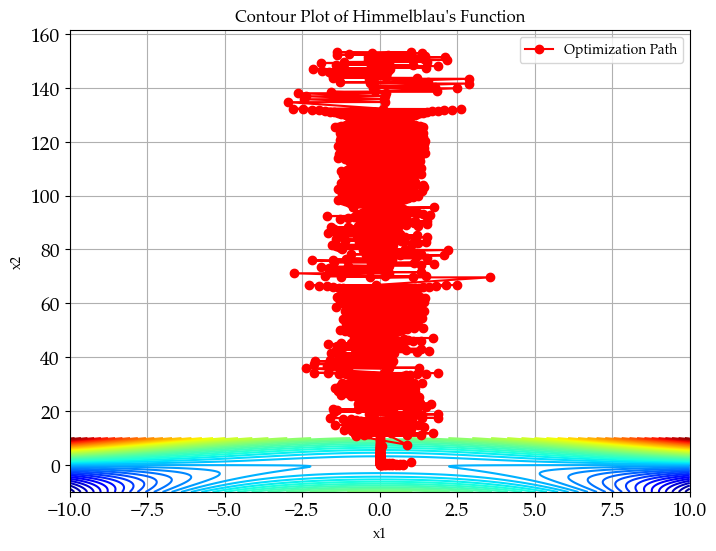

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Definisi fungsi dan gradien
def f(x):
    x1, x2, x3 = x
    return x1**2 * x2 + 4 * x2**2 - x2 * x3 + 1 / x3

# 2. Numerical gradient using central difference
def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.copy(x)
        x_backward = np.copy(x)
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)
    return grad

# 3. Backtracking line search with sufficient decrease (Armijo condition)
def backtracking_line_search(f, x, p, grad, alpha=1.0, rho=0.5, c=1e-4):
    while f(x + alpha * p) > f(x) + c * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha

# 4. Steepest descent optimization
def steepest_descent(f, x0, tol=1e-6, max_iter=1000):
    x = x0
    path = [x0.copy()]
    for _ in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            break
        p = -grad
        alpha = backtracking_line_search(f, x, p, grad)
        x = x + alpha * p
        path.append(x.copy())
    return x, path

# 5. Run optimization from a starting point
x0 = np.array([1.0, 1.0, 1.0])
xmin, path = steepest_descent(f, x0)
path = np.array(path)

print(f"Optimal value: {f(xmin)}")
print(f"Optimal point: {xmin}")
print(f"Total iterations: {len(path) - 1}")
# Print the last 5 iterations
for i, point in enumerate(path[-5:], start=len(path) - 5):
    print(f"Iteration ke-{i}: {point}")


# 6. Create contour plot
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Calculate Z values for the 2D grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f([X[i, j], Y[i, j], 1])  # Fix x3 to 1 for 2D visualization

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=50, cmap='jet')
ax.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Optimization Path')
ax.set_title("Contour Plot of Himmelblau's Function")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.grid(True)